# 1. importation des librairies

## 1.1 importation des librairies

In [296]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [297]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None) 

## 1.2 importation des dataframes

In [298]:
customers = pd.read_csv('../DA-P6/sources/customers_clean.csv')
products = pd.read_csv('../DA-P6/sources/products_clean.csv')
transactions = pd.read_csv('../DA-P6/sources/transactions_clean.csv')

## 1.3 fusion des dataframes

In [299]:
temp = pd.merge(transactions, customers, on='client_id', how='left')
complete = pd.merge(temp, products, on='id_prod', how='left')
complete = complete.sort_values("session_id")
#complete.shape
complete['date'] = pd.to_datetime(complete['date'])
complete['year'] = complete['date'].dt.year
complete['month'] = complete['date'].dt.month
complete['day'] = complete['date'].dt.day
complete['year/month'] = complete['date'].dt.strftime('%Y %m')
complete['date'] = complete['date'].dt.strftime('%Y %m %d')
complete.info()
display(complete[:10])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 480501 to 633370
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  int64  
 6   age         679332 non-null  int64  
 7   price       679111 non-null  float64
 8   categ       679111 non-null  float64
 9   year        679332 non-null  int64  
 10  month       679332 non-null  int64  
 11  day         679332 non-null  int64  
 12  year/month  679332 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 72.6+ MB


,id_prod,date,session_id,client_id,sex,birth,age,price,categ,year,month,day,year/month
480501,0_1259,2021 03 01,s_1,c_329,f,1967,55,11.99,0.0,2021,3,1,2021 03
138881,1_635,2021 03 01,s_10,c_2218,f,1970,52,26.99,1.0,2021,3,1,2021 03
359999,0_1030,2021 03 01,s_100,c_3854,f,1978,44,13.73,0.0,2021,3,1,2021 03
578652,0_1451,2021 03 01,s_100,c_3854,f,1978,44,19.99,0.0,2021,3,1,2021 03
542598,0_1449,2021 03 03,s_1000,c_1014,m,1989,33,4.99,0.0,2021,3,3,2021 03
377730,0_1590,2021 03 03,s_1000,c_1014,m,1989,33,18.93,0.0,2021,3,3,2021 03
87789,0_1438,2021 03 03,s_1000,c_1014,m,1989,33,9.31,0.0,2021,3,3,2021 03
142827,0_1625,2021 03 03,s_1000,c_1014,m,1989,33,5.99,0.0,2021,3,3,2021 03
219941,0_1324,2021 03 22,s_10000,c_476,f,1989,33,3.93,0.0,2021,3,22,2021 03
345882,0_1418,2021 03 22,s_10000,c_476,f,1989,33,8.57,0.0,2021,3,22,2021 03


# 2. annalyse du prix

,year,price
0,2021,4770826.56
1,2022,6108681.81
2,2023,974220.31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year/month  24 non-null     object 
 1   price       24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


,year/month,Chiffre d'affaires
0,2021 03,482440.61
1,2021 04,476109.30
2,2021 05,492943.47
3,2021 06,484088.56
4,2021 07,482835.40
5,2021 08,482284.79
6,2021 09,507240.68
7,2021 10,320798.74
8,2021 11,516167.73
9,2021 12,525917.28


<AxesSubplot:xlabel='year/month'>

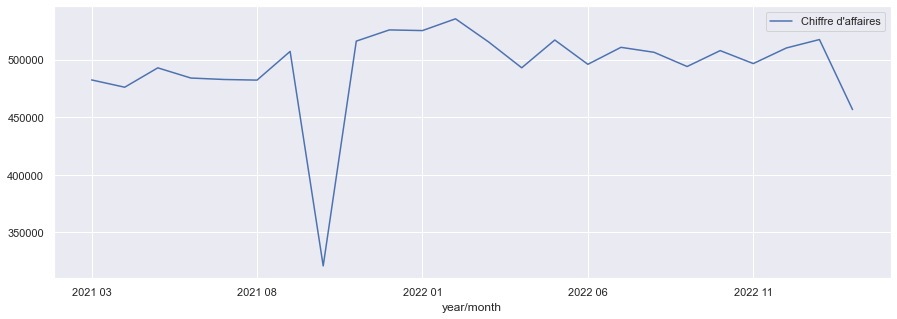

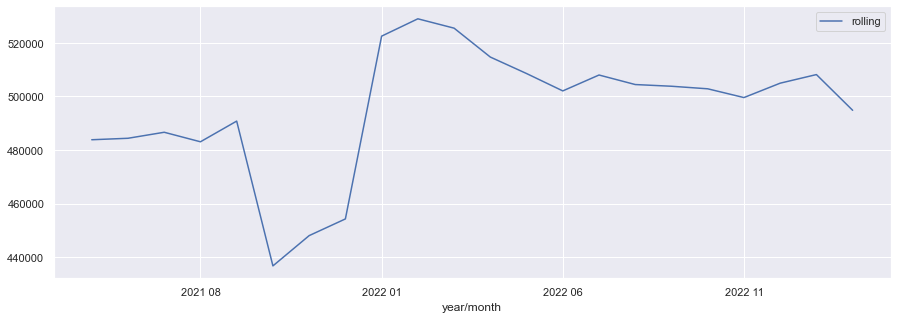

In [303]:
complete = complete.sort_values("date")
ca_year = complete.groupby(['year'], as_index=False)['price'].sum()
display(ca_year)
affair = complete.groupby(['year/month'], as_index=False)['price'].sum()
affair.info()
affair.rename(columns={"price":"Chiffre d'affaires"}, inplace=True)
display(affair)

#df.close.rolling(3, win_type ='triang').sum()
sns.set(rc = {'figure.figsize':(15,5)})
affair['rolling'] = affair["Chiffre d'affaires"].rolling(3).mean()
#display(affair)
affair.plot(x='year/month', y="Chiffre d'affaires")
affair.plot(x='year/month', y='rolling')